In [39]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Random Forest Regression

In [3]:
path = Path

In [21]:
features = pd.read_csv('btcmain2.csv')
features.head(5)

,date,hash_rate,wallets,wallet_trans_perday,difficulty,wallet_trans_volume,avg_block_size,api_blockchain_size,miners_revenue,cost_per_trans,...,unique_addresses_used,trans_excl_popular,transactions,num_transactions,trans_fees_usd,trans_fees,market_cap,total_bitcoins,price,365price
0,2011-01-01,0.128162,2,0,14484.16236,0.0,0.000962,10.0,2669.9822,4.494920,...,768,594,218493,594,0.020746,0.069153,1508164.946,5018350.0,0.299998,5.2000
1,2011-01-02,0.129602,2,0,14484.16236,0.0,0.000938,10.0,2699.9640,4.553059,...,775,593,219086,593,0.027387,0.091291,1510854.855,5027250.0,0.299996,5.4999
2,2011-01-03,0.132946,2,0,16307.42094,0.0,0.001786,10.0,2459.9836,2.883920,...,779,853,219939,853,0.208915,0.696386,1513324.911,5036250.0,0.299998,5.2900
3,2011-01-04,0.115112,2,0,16307.42094,0.0,0.002296,10.0,2129.2829,1.714398,...,956,1242,221181,1242,0.023855,0.079545,1514954.793,5044450.0,0.299899,5.6063
4,2011-01-05,0.121597,2,0,16307.42094,0.0,0.002129,10.0,2242.4850,1.881279,...,943,1192,222373,1192,0.017457,0.058386,1512645.832,5051550.0,0.298998,6.3990


In [22]:
labels = np.array(features['365price'])
features= features.drop('365price', axis = 1)
features= features.drop('date', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [23]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2463, 21)
Training Labels Shape: (2463,)
Testing Features Shape: (821, 21)
Testing Labels Shape: (821,)


In [24]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [25]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 138.66 degrees.


In [26]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.74 %.


In [32]:
dft = pd.read_csv('smalltest.csv')
dft= dft.drop(['date','365price'], axis = 1)
predictions = pd.DataFrame(rf.predict(dft))
predictions

,0
0,21354.29831
1,21377.90731
2,21372.44656
3,21325.24890
4,21350.95644
5,21367.67960
6,21385.41029
7,21374.23420


### Interpretation

In [34]:
fi = rf.feature_importances_

In [35]:
pd.DataFrame({'Variable':feature_list,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
14,transactions,0.196527
1,wallets,0.188675
3,difficulty,0.188384
6,api_blockchain_size,0.179143
19,total_bitcoins,0.156485
4,wallet_trans_volume,0.036904
20,price,0.013427
2,wallet_trans_perday,0.012283
8,cost_per_trans,0.007087
9,us_exchange_traded_vol,0.006704


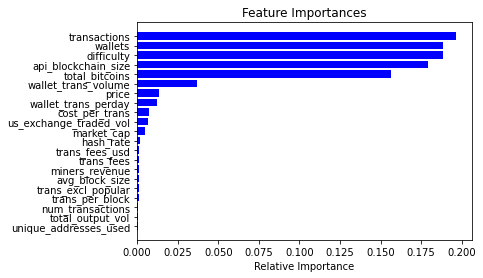

In [42]:
features=feature_list
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()